# Notebook 6a - Finding cloud frequency using spectral thresholds for Washington

Using Notebook 4 (goes_eval_w_camera), we have found a combination of thresholds using a decision tree to identify cloudy vs. clear pixels in GOES data.

In [1]:
import rasterio
import geopandas as gpd
from matplotlib.colors import LightSource
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from analysis_utils import daily_cloud_frequency, process_monthly_data

## Calculate cloud frequency and sum monthly

### Run the functions

In [2]:
year = '2022'
state = 'washington'
goes = 'goes17'
months_list = ['06', '07', '08', '09']
# months_list = ['09']
# for month in months_list:
#     daily_cloud_frequency(year, month, state, goes)

In [4]:
# Define the months and their corresponding variable names
months_dict = {'06': 'jun_cloud_freq', '07': 'jul_cloud_freq', 
               '08': 'aug_cloud_freq', '09': 'sep_cloud_freq'}
# Dictionary to store the datasets
cloud_freq_datasets = {}

# Loop through the months and process the data
for month, var_name in months_dict.items():
    ds = process_monthly_data(year, month, state, goes, save_file=False)  # Process the data for the month
    cloud_freq_datasets[var_name] = ds  # Save the dataset with the variable name as the key

# Access the datasets
jun_cloud_freq = cloud_freq_datasets['jun_cloud_freq']
jul_cloud_freq = cloud_freq_datasets['jul_cloud_freq']
aug_cloud_freq = cloud_freq_datasets['aug_cloud_freq']
sep_cloud_freq = cloud_freq_datasets['sep_cloud_freq']


In [5]:
# sep_minus_aug = sep_cloud_freq['monthly_frequency'] - aug_cloud_freq['monthly_frequency']
aug_minus_jul = aug_cloud_freq['monthly_frequency'] - jul_cloud_freq['monthly_frequency']

## Plots

TODO add washington DEM

In [6]:
# Path to the DEM file
dem_path = "nasa_colorado_dem.tif"

# Open the DEM file
with rasterio.open(dem_path) as src:
    elevation = src.read(1)  # Read the first band (elevation data)
    bounds = src.bounds      # Get the bounds of the DEM
    extent = [bounds.left, bounds.right, bounds.bottom, bounds.top]

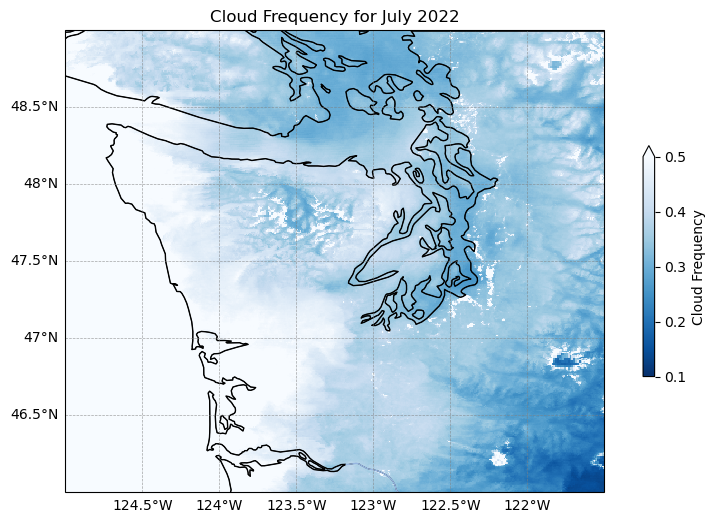

In [8]:
# Create the plot with Cartopy projection
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())  # Use PlateCarree for geographic data

# Plot the data
jul_cloud_freq.monthly_frequency.plot(
    ax=ax, 
    cmap="Blues_r",  
    transform=ccrs.PlateCarree(),  # Specify the data's coordinate system
    cbar_kwargs={'label': 'Cloud Frequency', 'shrink': 0.5},
    vmin=0.1, vmax=0.5  # Set color scale limits
)

# Add state outlines and coastlines
ax.add_feature(cfeature.COASTLINE, linewidth=1, edgecolor='black')
ax.add_feature(cfeature.STATES, linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor="black")
ax.add_feature(cfeature.RIVERS)
# Add gridlines with latitude and longitude labels
gridlines = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.7, linestyle='--')
gridlines.top_labels = False  # Disable top labels
gridlines.right_labels = False  # Disable right labels
gridlines.xlabel_style = {'size': 10, 'color': 'black'}
gridlines.ylabel_style = {'size': 10, 'color': 'black'}


# Add title and labels
plt.title(f"Cloud Frequency for July 2022")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

ax.set_extent([-125, -121.5, 46, 49], crs=ccrs.PlateCarree()) # Western Washington

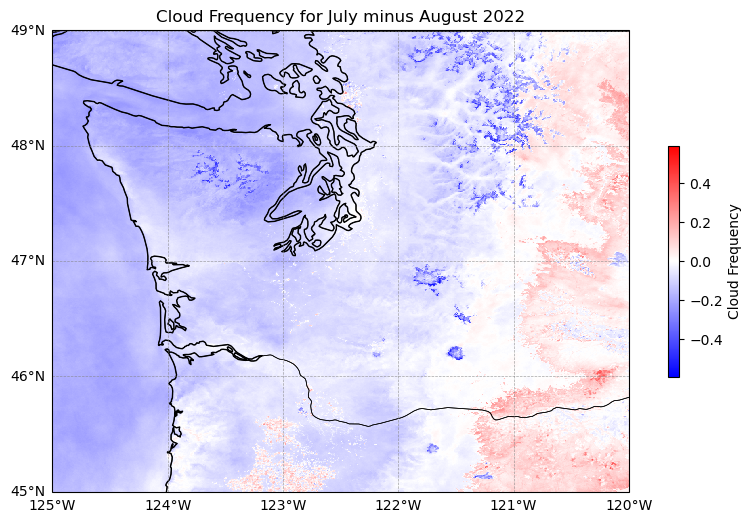

In [17]:
# Create the plot with Cartopy projection
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())  # Use PlateCarree for geographic data

# Plot the cloud frequency data
aug_minus_jul.plot(
    ax=ax, 
    cmap="bwr",  
    transform=ccrs.PlateCarree(),  # Specify the data's coordinate system
    cbar_kwargs={'label': 'Cloud Frequency', 'shrink': 0.5}
)

# # plot east river bounds
# east_river.plot(ax=ax, edgecolor='k', facecolor='none', linewidth=2, zorder=1, transform=ccrs.PlateCarree())


# # Add elevation contours
# contour_levels = np.arange(1000, 4000, 500)  # Define contour levels (e.g., 1000m to 4000m)
# elevation_masked = np.ma.masked_invalid(elevation)  # Mask invalid elevation values
# contour = ax.contour(
#     elevation_masked, 
#     levels=contour_levels, 
#     colors='black', 
#     linewidths=0.8, 
#     transform=ccrs.PlateCarree(), 
#     extent=extent,
#     alpha=0.5  # Set transparency for contours
# )
# ax.clabel(contour, inline=True, fontsize=8, fmt='%d')  # Add labels to contours


# Add state outlines and coastlines
ax.add_feature(cfeature.COASTLINE, linewidth=1, edgecolor='black')
ax.add_feature(cfeature.STATES, linewidth=0.5, edgecolor='black')
# Add gridlines with latitude and longitude labels
gridlines = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.7, linestyle='--')
gridlines.top_labels = False  # Disable top labels
gridlines.right_labels = False  # Disable right labels
gridlines.xlabel_style = {'size': 10, 'color': 'black'}
gridlines.ylabel_style = {'size': 10, 'color': 'black'}


# Add title and labels
plt.title(f"Cloud Frequency for July minus August 2022")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# ax.set_extent([-107.4, -106.4, 38.5, 39.5], crs=ccrs.PlateCarree())  # east riverish extent


# ax.text(-107.3, 39.4, 'East River Basin', fontsize=10, transform=ccrs.PlateCarree(), zorder=2)

# Show the plot
plt.show()

### Plot NIR vs. no NIR cloud frequency differences

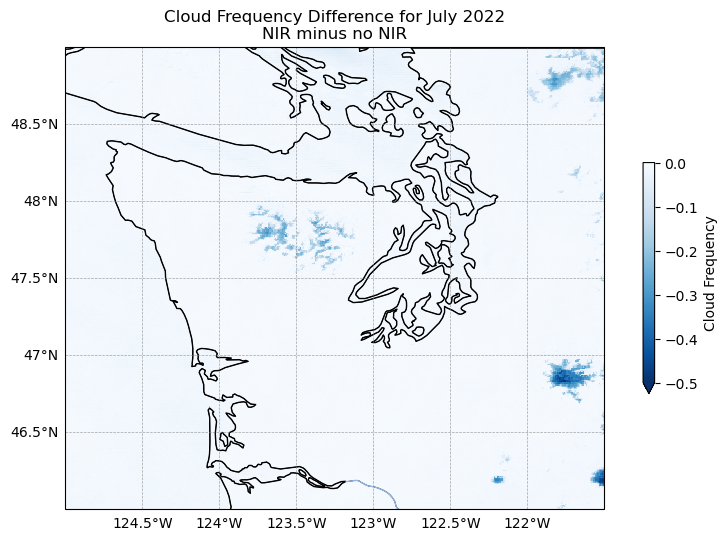

In [9]:
# Create the plot with Cartopy projection
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())  # Use PlateCarree for geographic data

# Plot the data
jun_diff.plot(
    ax=ax, 
    cmap="Blues_r",  
    transform=ccrs.PlateCarree(),  # Specify the data's coordinate system
    cbar_kwargs={'label': 'Cloud Frequency', 'shrink': 0.5},
    vmin = -0.5, vmax = 0   # Set color scale limits
)

# Add state outlines and coastlines
ax.add_feature(cfeature.COASTLINE, linewidth=1, edgecolor='black')
ax.add_feature(cfeature.STATES, linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor="black")
ax.add_feature(cfeature.RIVERS)
# Add gridlines with latitude and longitude labels
gridlines = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.7, linestyle='--')
gridlines.top_labels = False  # Disable top labels
gridlines.right_labels = False  # Disable right labels
gridlines.xlabel_style = {'size': 10, 'color': 'black'}
gridlines.ylabel_style = {'size': 10, 'color': 'black'}

# Add title and labels
plt.title(f"Cloud Frequency Difference for July 2022\nNIR minus no NIR")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

ax.set_extent([-125, -121.5, 46, 49], crs=ccrs.PlateCarree()) # Western Washington